# Tarot (JSON)
* data source: https://www.kaggle.com/lsind18/tarot-json
* kaggle api: `kaggle datasets download -d lsind18/tarot-json`
* ref notebook: https://www.kaggle.com/lsind18/overview-of-tarot-deck
* Thai: https://www.shitsuren-tarot.com/tarot/

In [1]:
import io
import random

import json
import requests

import pandas as pd
from pandas import json_normalize

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas version = {pd.__version__}')

pandas version = 1.3.4


In [3]:
from IPython.display import JSON

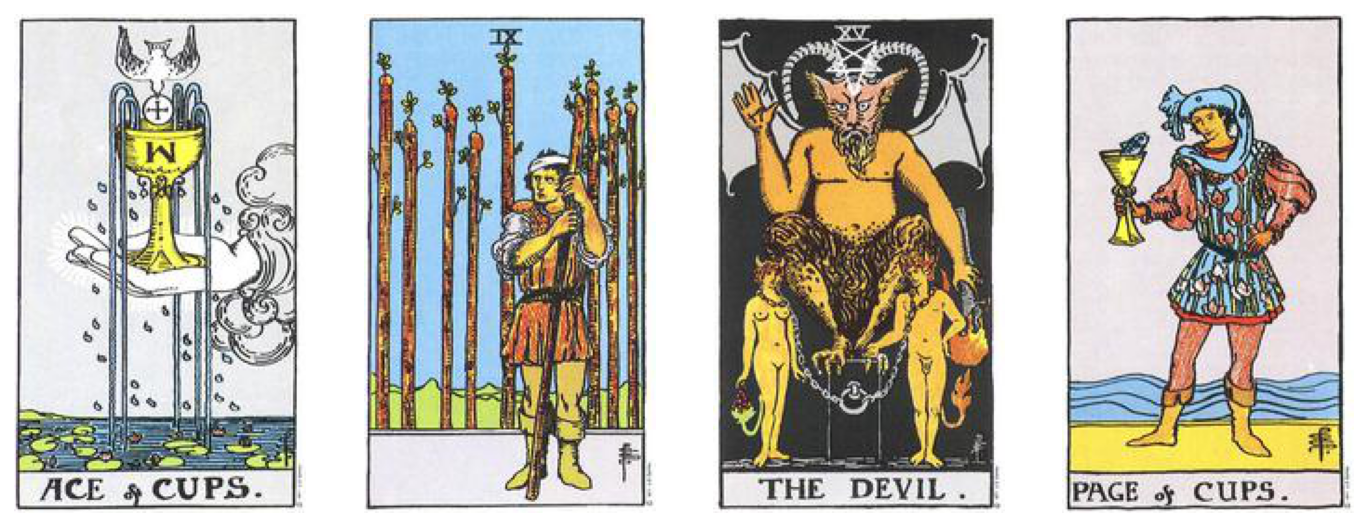

In [4]:
class Tarot():
    deck=None
    
    def __init__(self, n_cards:int=1):
        if not self.deck:
            url = 'https://github.com/prasertcbs/basic-dataset/raw/master/tarot-json/tarot-images.json'
            r = requests.get(url)
            self.deck=r.json()['cards']
        self.selected_cards=self.random_cards(n_cards)
        
    def random_cards(self, n_cards:int=1):
        """
        random n_cards from deck and return dictionary containing each card info
        """
        no_cards=len(self.deck)
        r_cards=random.sample(list(range(no_cards)), n_cards)
        d={}
        for card_no in r_cards:
            d[card_no]=self.deck[card_no]
        return d

    def get_img(self, url):
        r=requests.get(url, stream=True)
        img=Image.open(io.BytesIO(r.content))
        return img

    def card_img(self, card_no):
        """
        get card_no image from github
        """
        img_prefix_url = 'https://github.com/prasertcbs/basic-dataset/raw/master/tarot-json/cards_small_jpg/'
        img_url=f"{img_prefix_url}{self.deck[card_no]['img']}"
        return self.get_img(img_url)

    def show_cards(self, cards):
        """
        show card images with matplotlib
        """
        n_cards=len(cards)
        plt.figure(figsize=(12, 4*n_cards))
#         print(cards)
        i=1
        for k, v in cards.items():
#             print(k, v)
            img = self.card_img(k)
            plt.subplot(1, n_cards, i)
            i += 1
            plt.imshow(img)
            plt.axis('off')
    
    def question_to_ask(self, card_no):
        return self.deck[card_no]['Questions to Ask']
    
    def fortune_telling(self, card_no):
        return self.deck[card_no]['name'], self.deck[card_no]['fortune_telling']
        
d=Tarot(4)
JSON(d.selected_cards)
# selected_cards=d.random_cards(1)
d.show_cards(d.selected_cards)
# d.fortune_telling(3)
# d.question_to_ask(3)

## read_json to pandas DataFrame

In [5]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/tarot-json/tarot-images.json'
jdoc=pd.read_json(url)
jdoc

,description,cards
0,"tarot cards and basic information about them, ...","{'name': 'The Fool', 'number': '0', 'arcana': ..."
1,"tarot cards and basic information about them, ...","{'name': 'The Magician', 'number': '1', 'arcan..."
2,"tarot cards and basic information about them, ...","{'name': 'The High Priestess', 'number': '2', ..."
3,"tarot cards and basic information about them, ...","{'name': 'The Empress', 'number': '3', 'arcana..."
4,"tarot cards and basic information about them, ...","{'name': 'The Emperor', 'number': '4', 'arcana..."
...,...,...
73,"tarot cards and basic information about them, ...","{'name': 'Ten of Pentacles', 'number': '10', '..."
74,"tarot cards and basic information about them, ...","{'name': 'Page of Pentacles', 'number': '11', ..."
75,"tarot cards and basic information about them, ...","{'name': 'Knight of Pentacles', 'number': '12'..."
76,"tarot cards and basic information about them, ...","{'name': 'Queen of Pentacles', 'number': '13',..."


In [6]:
df=json_normalize(jdoc['cards'])
df.head()

,name,number,arcana,suit,img,fortune_telling,keywords,Archetype,Hebrew Alphabet,Numerology,Elemental,Mythical/Spiritual,Questions to Ask,meanings.light,meanings.shadow,Astrology,Affirmation
0,The Fool,0,Major Arcana,Trump,m00.jpg,"[Watch for new projects and new beginnings, Pr...","[freedom, faith, inexperience, innocence]",The Divine Madman,Aleph/Ox/1,0 (off the scale; pure potential),Air,Adam before the fall. Christ as a wandering ho...,[What would I do if I felt free to take a leap...,"[Freeing yourself from limitation, Expressing ...","[Being gullible and naive, Taking unnecessary ...",NaN,NaN
1,The Magician,1,Major Arcana,Trump,m01.jpg,"[A powerful man may play a role in your day, Y...","[capability, empowerment, activity]",The Ego/The Self,Beth/House/2,"1 (origins, unity, seeds)",The Sun/Mercury,"Thoth, the Egyptian god of wisdom, known to th...","[What am I empowered to do?, How might my abil...","[Taking appropriate action, Receiving guidance...","[Inflating your own ego, Abusing talents, Mani...",NaN,NaN
2,The High Priestess,2,Major Arcana,Trump,m02.jpg,"[A mysterious woman arrives, A sexual secret m...","[intuition, reflection, purity, initiation]",The Virgin/The Maiden,Gimel/Camel/3,"2 (division, debate, duality)",The Moon,"The feminine aspect of divinity, particularity...","[What might a rebel against tradition do?, Wha...","[Listening to your feelings and intuitions, Ex...","[Being aloof, Obsessing on secrets and conspir...",NaN,NaN
3,The Empress,3,Major Arcana,Trump,m03.jpg,"[Pregnancy is in the cards, An opportunity to ...","[fertility, productivity, ripeness, nurturing]",The Mother,Daleth/Door/4,"3 (expression, productivity, output)",Venus,"Gaia, Mother Earth, Ishtar, DemeterÑmature, re...",[What would a concerned and capable mother do?...,"[Nurturing yourself and others, Bearing fruit,...","[Overindulging, Being greedy, Smothering someo...",NaN,NaN
4,The Emperor,4,Major Arcana,Trump,m04.jpg,"[A father figure arrives, A new employer or au...","[authority, regulation, direction, structure]",The Father,"He[as]/Window/5, or in some decks, Tzaddi/Fish...","4 (stability, equality, persistence)",Mars/Aries,"Masculine gods, including the Hebrew God, the ...",[How does the issue of control or regulation i...,"[Exercising authority, Defining limits, Direct...","[Micromanaging, Crushing the creativity of oth...",NaN,NaN


In [7]:
# df.to_csv('tarot.csv', index=False)

In [8]:
df['keywords']

0             [freedom, faith, inexperience, innocence]
1                   [capability, empowerment, activity]
2           [intuition, reflection, purity, initiation]
3        [fertility, productivity, ripeness, nurturing]
4         [authority, regulation, direction, structure]
                            ...                        
73              [wealth, abundance, acquisition, greed]
74    [practicality, prosperity, learning, growth, a...
75                 [caution, focus, realism, invention]
76    [luxury, comfort, resourcefulness, generosity,...
77    [stability, dependability, confidence, interve...
Name: keywords, Length: 78, dtype: object

In [9]:
df.iloc[0]['keywords']

['freedom', 'faith', 'inexperience', 'innocence']

In [10]:
df.iloc[0]['keywords'][0]

'freedom'

In [11]:
df['keywords'][0]

['freedom', 'faith', 'inexperience', 'innocence']

In [12]:
df

,name,number,arcana,suit,img,fortune_telling,keywords,Archetype,Hebrew Alphabet,Numerology,Elemental,Mythical/Spiritual,Questions to Ask,meanings.light,meanings.shadow,Astrology,Affirmation
0,The Fool,0,Major Arcana,Trump,m00.jpg,"[Watch for new projects and new beginnings, Pr...","[freedom, faith, inexperience, innocence]",The Divine Madman,Aleph/Ox/1,0 (off the scale; pure potential),Air,Adam before the fall. Christ as a wandering ho...,[What would I do if I felt free to take a leap...,"[Freeing yourself from limitation, Expressing ...","[Being gullible and naive, Taking unnecessary ...",NaN,NaN
1,The Magician,1,Major Arcana,Trump,m01.jpg,"[A powerful man may play a role in your day, Y...","[capability, empowerment, activity]",The Ego/The Self,Beth/House/2,"1 (origins, unity, seeds)",The Sun/Mercury,"Thoth, the Egyptian god of wisdom, known to th...","[What am I empowered to do?, How might my abil...","[Taking appropriate action, Receiving guidance...","[Inflating your own ego, Abusing talents, Mani...",NaN,NaN
2,The High Priestess,2,Major Arcana,Trump,m02.jpg,"[A mysterious woman arrives, A sexual secret m...","[intuition, reflection, purity, initiation]",The Virgin/The Maiden,Gimel/Camel/3,"2 (division, debate, duality)",The Moon,"The feminine aspect of divinity, particularity...","[What might a rebel against tradition do?, Wha...","[Listening to your feelings and intuitions, Ex...","[Being aloof, Obsessing on secrets and conspir...",NaN,NaN
3,The Empress,3,Major Arcana,Trump,m03.jpg,"[Pregnancy is in the cards, An opportunity to ...","[fertility, productivity, ripeness, nurturing]",The Mother,Daleth/Door/4,"3 (expression, productivity, output)",Venus,"Gaia, Mother Earth, Ishtar, DemeterÑmature, re...",[What would a concerned and capable mother do?...,"[Nurturing yourself and others, Bearing fruit,...","[Overindulging, Being greedy, Smothering someo...",NaN,NaN
4,The Emperor,4,Major Arcana,Trump,m04.jpg,"[A father figure arrives, A new employer or au...","[authority, regulation, direction, structure]",The Father,"He[as]/Window/5, or in some decks, Tzaddi/Fish...","4 (stability, equality, persistence)",Mars/Aries,"Masculine gods, including the Hebrew God, the ...",[How does the issue of control or regulation i...,"[Exercising authority, Defining limits, Direct...","[Micromanaging, Crushing the creativity of oth...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Ten of Pentacles,10,Minor Arcana,Pentacles,p10.jpg,"[Big money is in the near future, Expect a pow...","[wealth, abundance, acquisition, greed]",NaN,NaN,"10 (The End: finality, completion, exhaustion)",NaN,NaN,"[How much stuff do I really need?, How do I fe...",[Celebrating your physical and financial bless...,[Spending all of your money on extravagant gif...,Mercury in Virgo,"""I keep physical and financial matters in pers..."
74,Page of Pentacles,11,Minor Arcana,Pentacles,p11.jpg,[This card represents a young man or woman wit...,"[practicality, prosperity, learning, growth, a...",NaN,NaN,NaN,Earth of Earth.,NaN,[How can you get more financial or sexual expe...,"[Learning the value of a dollar, Starting a sa...",[Trying to appear healthier or wealthier than ...,NaN,"""I am physically and financially responsible."""
75,Knight of Pentacles,12,Minor Arcana,Pentacles,p12.jpg,[A stingy person may chide you for spending mo...,"[caution, focus, realism, invention]",NaN,NaN,NaN,Air of Earth.,NaN,[What's the difference between caution and fea...,"[Spending money wisely, Saving for a rainy day...","[Throwing caution to the four winds, Spending ...",NaN,"""I temper my actions with cautious optimism."""
76,Queen of Pentacles,13,Minor Arcana,Pentacles,p13.jpg,[This card represents a woman with an expansiv...,"[luxury, comfort, resourcefulness, generosity,...",NaN,NaN,NaN,Water of Earth.,NaN,"[How do I define luxury?, To what extent am I ...","[Appreciating fine food, fine wine, beautiful ...","[Indulging in gluttony or greediness, Becoming..."

In [13]:
def get_img(url):
    r=requests.get(url, stream=True)
    img=Image.open(io.BytesIO(r.content))
    return img

def card_img(card_no):
    img_prefix_url = 'https://github.com/prasertcbs/basic-dataset/raw/master/tarot-json/cards2/'
    img_url=f"{img_prefix_url}{deck[card_no]['img']}"
    return get_img(img_url)

Your reading: Past, Present, Future on 2021-11-06


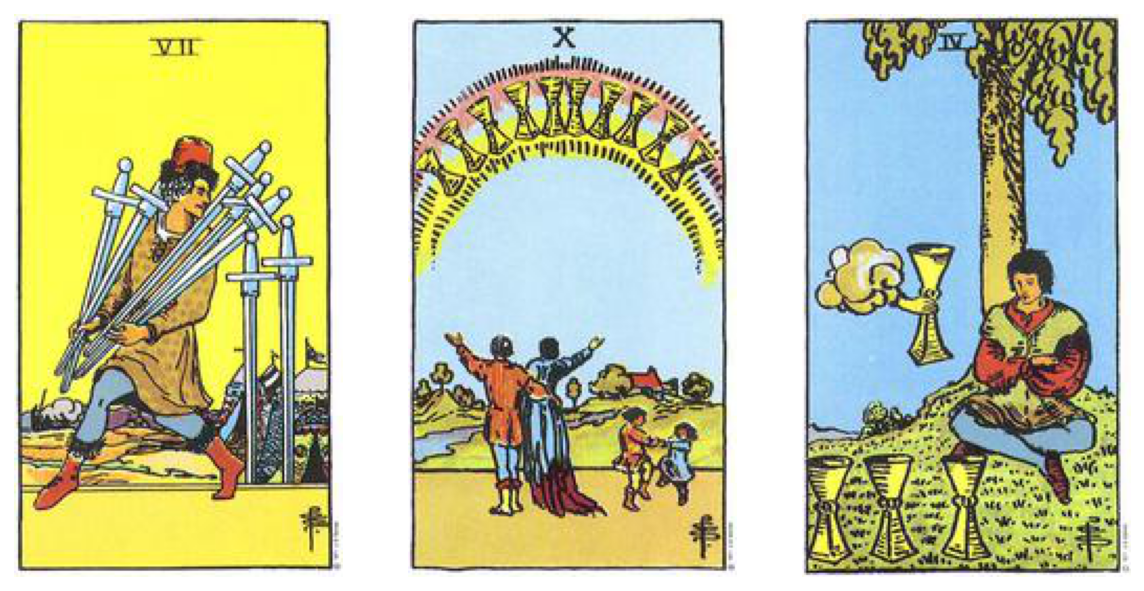

Seven of Swords:	
	Don't assume people around you are worthy of your trust
	Ask for an accounting of where people have been, and what they've been doing
Ten of Cups:	
	Marriage and family are in the cards
	Expect a friendship to blossom into a romance
Four of Cups:	
	A lover is getting restless
	Find out what he or she needs, or new opportunities may lure your partner away


In [14]:
import datetime
print("Your reading: Past, Present, Future on", datetime.datetime.now().date())

cards3 = df.sample(n = 3)

plt.figure(figsize=(10,10))
for i, im in enumerate(cards3['img'], start=1):
    img = get_img(f'https://github.com/prasertcbs/basic-dataset/raw/master/tarot-json/cards_small_jpg/{im}')
    plt.subplot(1,3,i)
    plt.imshow(img)
    plt.axis('off')

plt.show()


for index, row in cards3.iterrows():
    print(f"{row['name']}:\t")
    for r in row['fortune_telling']:
        print(f"\t{r}")
